<a href="https://colab.research.google.com/github/asad14053/Machine-Learning-and-Deep-Learning/blob/main/ML_thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
import time
start_time = time.time()
# print('start_time: ', start_time)
!pip install PySimpleGUI
import torch
import PySimpleGUI as sg

!pip install matplotlib
import matplotlib
matplotlib.use('TkAgg')
from matplotlib.backends.backend_tkagg import FigureCanvasAgg
import matplotlib.backends.backend_tkagg as tkagg
import tkinter as Tk


import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import sys
import pickle

from torch import nn, optim
from torchvision import transforms
from collections import OrderedDict

In [185]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [186]:
scaler1 = MinMaxScaler()  
scaler2 = MinMaxScaler() 

In [187]:
no_of_output_nodes = 5

df_1 = pd.read_excel("pcf_modeSoln_data_1.xlsx", sheet_name="SiO2-air-rings-5-dBYp-0.7")
datafile_1 = df_1.values                  ## stored data from xlsx file
#print(datafile_1)

In [188]:
##########    taking data from other sheets    #############
sheets_names = ["SiO2-air-rings-4-dBYp-0.8", "SiO2-air-rings-4-dBYp-0.9", 
                "SiO2-air-rings-4-dBYp-0.7", "SiO2-air-rings-5-dBYp-0.6", 
                "SiO2-air-rings-5-dBYp-0.8", "SiO2-air-rings-5-dBYp-0.9",
                "SiO2-air-rings-4-dBYp-0.6"]
# sheets_names = []
for sheet_name in sheets_names:
    print(sheet_name)
    df_sheet_name = pd.read_excel("pcf_modeSoln_data_1.xlsx", sheet_name=sheet_name)
    datafile_sheet_name = df_sheet_name.values                  ## stored data from xlsx file
    #print(datafile_sheet_name)
    #########    combining data from all sheets of excel file    #########
    datafile_1 = np.concatenate((datafile_1, datafile_sheet_name), axis=0)


print(datafile_1)
print(len(datafile_1))
print()

SiO2-air-rings-4-dBYp-0.8
SiO2-air-rings-4-dBYp-0.9
SiO2-air-rings-4-dBYp-0.7
SiO2-air-rings-5-dBYp-0.6
SiO2-air-rings-5-dBYp-0.8
SiO2-air-rings-5-dBYp-0.9
SiO2-air-rings-4-dBYp-0.6
[[ 1.44400000e+00  1.00000000e+00  5.00000000e+00 ... -6.67351000e+02
   6.12700000e+01  1.78724788e+00]
 [ 1.44400000e+00  1.00000000e+00  5.00000000e+00 ... -7.28993000e+02
   8.27376000e+00  9.17702919e-01]
 [ 1.44400000e+00  1.00000000e+00  5.00000000e+00 ... -5.86632000e+02
   7.66277000e-01 -1.15614210e-01]
 ...
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00 ...  5.64126000e+01
   3.07385000e-12 -1.15123173e+01]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00 ...  5.48488000e+01
   2.18833000e-12 -1.16598872e+01]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00 ...  5.33584000e+01
   1.59437000e-12 -1.17974109e+01]]
1118



In [189]:
########   just to see output variable values   ##########
out_var_datafile_1 = datafile_1[:,range(6,11)]              ## stored output_variable (4th column) from xlsx file
out_var_datafile_1 = out_var_datafile_1.reshape((-1,no_of_output_nodes))    ## one column with unknown no. of rows
print(out_var_datafile_1)
print('no. of training points: ', len(out_var_datafile_1))

[[ 1.27882000e+00  4.42229000e+00 -6.67351000e+02  6.12700000e+01
   1.78724788e+00]
 [ 1.29642000e+00  2.41020000e+00 -7.28993000e+02  8.27376000e+00
   9.17702919e-01]
 [ 1.31464000e+00  1.67653000e+00 -5.86632000e+02  7.66277000e-01
  -1.15614210e-01]
 ...
 [ 1.46453000e+00  4.02620000e+00  5.64126000e+01  3.07385000e-12
  -1.15123173e+01]
 [ 1.46495000e+00  4.00741000e+00  5.48488000e+01  2.18833000e-12
  -1.16598872e+01]
 [ 1.46532000e+00  3.99021000e+00  5.33584000e+01  1.59437000e-12
  -1.17974109e+01]]
no. of training points:  1118


In [190]:
scaler1.fit(datafile_1)
scaler2.fit(out_var_datafile_1)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [191]:
scaler_datafile_1 = scaler1.transform(datafile_1)
X = scaler_datafile_1[:,range(0,6)]                 ## input variables columns
y = scaler_datafile_1[:,range(6,11)] 

In [192]:
print(X)
print()
print(y)

[[0.         0.         1.         0.33333333 0.         1.        ]
 [0.         0.         1.         0.33333333 0.         0.83333077]
 [0.         0.         1.         0.33333333 0.         0.70247692]
 ...
 [0.         0.         0.         0.         1.         0.03164538]
 [0.         0.         0.         0.         1.         0.01519769]
 [0.         0.         0.         0.         1.         0.        ]]

[[3.57051746e-01 7.67823103e-01 3.31887244e-01 3.30870838e-01
  9.80525901e-01]
 [4.17726756e-01 3.78665116e-01 2.91588952e-01 4.46800376e-02
  9.45272641e-01]
 [4.80539180e-01 2.36766126e-01 3.84657074e-01 4.13805636e-03
  9.03379698e-01]
 ...
 [9.97276519e-01 6.91215403e-01 8.05045753e-01 1.65994350e-14
  4.41332351e-01]
 [9.98724446e-01 6.87581232e-01 8.04023422e-01 1.18174414e-14
  4.35349546e-01]
 [1.00000000e+00 6.84254583e-01 8.03049077e-01 8.60993299e-15
  4.29774033e-01]]


In [193]:
X, y = shuffle(X, y)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.1)
X_train = X_train.reshape(-1, 6)                                ## 2nd column value is = no. of input variables columns
y_train = y_train.reshape(-1, no_of_output_nodes)               ## 2nd column value is = no. of output variables columns
X_validation = X_validation.reshape(-1, 6)                      ## 2nd column value is = no. of input variables columns
y_validation = y_validation.reshape(-1, no_of_output_nodes)     ## 2nd column value is = no. of output variables columns
print('no. of training points: ', len(X_train))
print('no. of validation points: ', len(X_validation))

no. of training points:  1006
no. of validation points:  112


In [194]:
###########     manual testing    #########
df_2 = pd.read_excel("pcf_modeSoln_data_manual_1.xlsx", sheet_name="Sheet1")
datafile_2 = df_2.values                  ## stored data from xlsx file
print(datafile_2)
scaler_datafile_2 = scaler1.transform(datafile_2)
X_test = scaler_datafile_2[:,range(0,6)]            ## input variables columns
y_test = scaler_datafile_2[:,range(6,11)]                     ## output variables columns
print(X_test)
print()
print(y_test)
print('no. of test points: ', len(X_test))
X_test = X_test.reshape(-1, 6)                      ## 2nd column value is = no. of input variables columns
y_test = y_test.reshape(-1, no_of_output_nodes)     ## 2nd column value is = no. of output variables columns
###########################################

[[ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.70000000e+00  1.38489000e+00  3.04184000e+00
   4.29646000e+01  1.54506000e-04 -3.81105465e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.60000000e+00  1.39268000e+00  2.90433000e+00
   6.67628000e+01  3.24724000e-05 -4.48848561e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.50000000e+00  1.40035000e+00  2.78024000e+00
   8.64249000e+01  6.02749000e-06 -5.21986350e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.40000000e+00  1.40784000e+00  2.66742000e+00
   1.02097000e+02  9.78811000e-07 -6.00930116e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.30000000e+00  1.41511000e+00  2.56412000e+00
   1.14007000e+02  1.37772000e-07 -6.86083904e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  

In [195]:
input_dim = 6                                       ## = no. of input variables columns
output_dim = no_of_output_nodes                     ## = no. of output variables columns
from collections import OrderedDict

In [196]:
# ############     model without dropout     #####################
# nodes_hidden_1 = 20
# nodes_hidden_2 = 20
# ## nn.Linear() is fully connected layer
# model = nn.Sequential(OrderedDict([
#                         ('fc1', nn.Linear(input_dim, nodes_hidden_1)),
#                         ('relu', nn.ReLU()),
#                         ('fc2', nn.Linear(nodes_hidden_1, nodes_hidden_2)),
#                         ('relu', nn.ReLU()),
#                         ('fc3', nn.Linear(nodes_hidden_2, output_dim)),
#                         ]))




############     model with dropout - 3 layers    #####################
####             dropout_prob leads to variations in mse curve      #########
dropout_prob = 0.0
nodes_hidden_1 = 50
nodes_hidden_2 = 50
nodes_hidden_3 = 50
## nn.Linear() is fully connected layer
model = nn.Sequential(OrderedDict([
                        ('fc1', nn.Linear(input_dim, nodes_hidden_1)),
                        ('relu', nn.ReLU()),
                        ('dropout', nn.Dropout(dropout_prob)),
                        ('fc2', nn.Linear(nodes_hidden_1, nodes_hidden_2)),
                        ('relu', nn.ReLU()),
                        ('dropout', nn.Dropout(dropout_prob)),
                        ('fc3', nn.Linear(nodes_hidden_2, nodes_hidden_3)),
                        ('relu', nn.ReLU()),
                        ('dropout', nn.Dropout(dropout_prob)),
                        ('fc4', nn.Linear(nodes_hidden_3, output_dim)),
                        ]))



# ############     model with dropout - 2 layers     #####################
# ####             dropout_prob leads to variations in mse curve    ###########
# dropout_prob = 0.1           # 0.5 - used in nvidia model-behavioural cloning
# nodes_hidden_1 = 50
# nodes_hidden_2 = 50
# ## nn.Linear() is fully connected layer
# model = nn.Sequential(OrderedDict([
#                         ('fc1', nn.Linear(input_dim, nodes_hidden_1)),
#                         ('relu', nn.ReLU()),
#                         ('dropout', nn.Dropout(dropout_prob)),
#                         ('fc2', nn.Linear(nodes_hidden_1, nodes_hidden_2)),
#                         ('relu', nn.ReLU()),
#                         ('dropout', nn.Dropout(dropout_prob)),
#                         ('fc3', nn.Linear(nodes_hidden_2, output_dim)),
#                         ]))

In [197]:
print(model)
# model.double()
# print(X_train)
print(X_train.shape, y_train.shape)

Sequential(
  (fc1): Linear(in_features=6, out_features=50, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.0, inplace=False)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=5, bias=True)
)
(1006, 6) (1006, 5)


In [198]:
criterion = nn.MSELoss()
learning_rate = 0.0001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [199]:
print(device)
## move model to gpu if available, else cpu
# model.to(device)

cpu


In [200]:
epochs = 5000
# Convert numpy array to torch Variable
# inputs = torch.from_numpy(X_train).requires_grad_()
# labels = torch.from_numpy(y_train)
inputs = torch.Tensor((X_train))
labels = torch.Tensor((y_train))
inputs_validation = torch.Tensor((X_validation))
labels_validation = torch.Tensor((y_validation))
running_loss = []
running_loss_validation = []
for epoch in range(epochs):
    epoch += 1
        
    #################   train the model   ######################
    model.train()    # prep model for training
    # Clear gradients w.r.t. parameters, else gradients will be added up with every previous pass
    optimizer.zero_grad() 
    # Forward to get output
    outputs = model(inputs)
    # Calculate Loss
    loss = criterion(outputs, labels)       ## mean squared error
    # Getting gradients w.r.t. parameters
    loss.backward()
    # Updating parameters
    optimizer.step()         ## take a step with optimizer to update the weights
    running_loss.append(loss.item())

    
    
    # ###############    validate the model (not showing fluctuations)      ###################
    # # Turn off gradients for validation, saves memory and computations
    # with torch.no_grad():
    #     ## this turns off dropout for evaluation mode of model
    #     model.eval()      # prep model for evaluation
    #     outputs_validation = model(inputs_validation)
    #     loss_validation = criterion(outputs_validation, labels_validation)
    #     running_loss_validation.append(loss_validation.item())
    


    # ###############    validate the model (showing fluctuations)      ###################
    outputs_validation = model(inputs_validation)
    loss_validation = criterion(outputs_validation, labels_validation)
    running_loss_validation.append(loss_validation.item())
        
    

    print('epoch: {}, mse_loss: {:.6f}, mse_loss_validation: {:.6f}'.format(epoch, loss.item(), loss_validation.item()))
    # print(mean_squared_error(outputs_validation,labels_validation))



    # if (epoch == 1000):
    #     torch.save(model.state_dict(), 'checkpoint_1000.pth')
    # elif (epoch == 2500):
    #     torch.save(model.state_dict(), 'checkpoint_2500.pth')
    if (epoch == 5000):
       torch.save(model.state_dict(), 'checkpoint_5000.pth')        
    # elif (epoch == 7500):
    #     torch.save(model.state_dict(), 'checkpoint_7500.pth')        
    # elif (epoch == 10000):
    #     torch.save(model.state_dict(), 'checkpoint_10000.pth')        
    # elif (epoch == 12500):
    #     torch.save(model.state_dict(), 'checkpoint_12500.pth')        
    # elif (epoch == 15000):
    #     torch.save(model.state_dict(), 'checkpoint_15000.pth')        

   

Streaming output truncated to the last 5000 lines.
epoch: 1, mse_loss: 0.334758, mse_loss_validation: 0.330200
epoch: 2, mse_loss: 0.332252, mse_loss_validation: 0.327681
epoch: 3, mse_loss: 0.329757, mse_loss_validation: 0.325174
epoch: 4, mse_loss: 0.327273, mse_loss_validation: 0.322677
epoch: 5, mse_loss: 0.324800, mse_loss_validation: 0.320192
epoch: 6, mse_loss: 0.322338, mse_loss_validation: 0.317719
epoch: 7, mse_loss: 0.319887, mse_loss_validation: 0.315256
epoch: 8, mse_loss: 0.317448, mse_loss_validation: 0.312806
epoch: 9, mse_loss: 0.315020, mse_loss_validation: 0.310366
epoch: 10, mse_loss: 0.312603, mse_loss_validation: 0.307938
epoch: 11, mse_loss: 0.310197, mse_loss_validation: 0.305522
epoch: 12, mse_loss: 0.307803, mse_loss_validation: 0.303116
epoch: 13, mse_loss: 0.305419, mse_loss_validation: 0.300722
epoch: 14, mse_loss: 0.303047, mse_loss_validation: 0.298339
epoch: 15, mse_loss: 0.300685, mse_loss_validation: 0.295967
epoch: 16, mse_loss: 0.298334, mse_loss_val

In [201]:
# save the model, as weights & parameters are stored in model.state_dict()
# print(model.state_dict().keys())
# print(model.state_dict())
#### torch.save(model.state_dict(), 'checkpoint-epochs-{}.pth'.format(epochs))
torch.save(model.state_dict(), 'checkpoint.pth')
# # load the saved model at particular epochs to compare
state_dict = torch.load('checkpoint_5000.pth')
# load the saved model
#### state_dict = torch.load('checkpoint-epochs-{}.pth'.format(epochs))
# state_dict = torch.load('checkpoint.pth')
# state_dict = torch.load('checkpoint-simple_waveguide_neff_pytorch_1_epochs-5000.pth')
model.load_state_dict(state_dict)

<All keys matched successfully>

In [202]:
# Purely inference
# predicted_on_X_train = model(torch.Tensor(X_train).requires_grad_()).data.numpy()
# predicted_on_X_validation = model(torch.Tensor(X_validation).requires_grad_()).data.numpy()
# predicted_on_X_test = model(torch.Tensor(X_test).requires_grad_()).data.numpy()
with torch.no_grad():
    ## this turns off dropout for evaluation mode of model
    model.eval()
    predicted_on_X_train = model(torch.Tensor(X_train)).data.numpy()
    predicted_on_X_validation = model(torch.Tensor(X_validation)).data.numpy()
    predicted_on_X_test = model(torch.Tensor(X_test)).data.numpy()
     #print(predicted)

In [203]:
end_time = time.time()
print('end_time: ', end_time)
print('time taken to train in sec: ', (end_time - start_time))

end_time:  1619444756.4020464
time taken to train in sec:  25.005629777908325


In [204]:
## make axis bold

plt.rcParams.update({'font.size': 10})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["figure.figsize"] = (20,10)

In [205]:
mse_training_interval = 10
mse_validation_interval = 10
running_loss = running_loss[::mse_training_interval]
running_loss_index = [i for i in range(1, epochs, mse_training_interval)]
running_loss_validation = running_loss_validation[::mse_validation_interval]
running_loss_validation_index = [i for i in range(1, epochs, mse_validation_interval)]
print('mse lengths: ', len(running_loss), len(running_loss_validation))
print('running_loss_index: ', len(running_loss_index))
print('running_loss_validation_index: ', len(running_loss_validation_index))

mse lengths:  500 500
running_loss_index:  500
running_loss_validation_index:  500


In [206]:
###############################################################
#################   plotting graphs together - neff  ################
###############################################################

plt.figure()
plt.suptitle('pcf - neff - (epochs-{}) - pyTorch'.format(epochs), fontsize=25, 
                color='r', fontweight='bold')     ## giving title on top of all subplots

Text(0.5, 0.98, 'pcf - neff - (epochs-5000) - pyTorch')

<Figure size 1440x720 with 0 Axes>

Text(0.5, 0, 'epochs#')

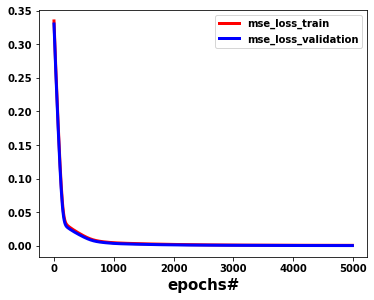

In [207]:
plt.subplot(231)
plt.plot(running_loss_index, running_loss, 'r-', linewidth=3, label='mse_loss_train')
plt.plot(running_loss_validation_index, running_loss_validation, 'b-', linewidth=3, label='mse_loss_validation')
plt.legend(loc='best', fontsize=10)
plt.xlabel('epochs#', fontsize=15)

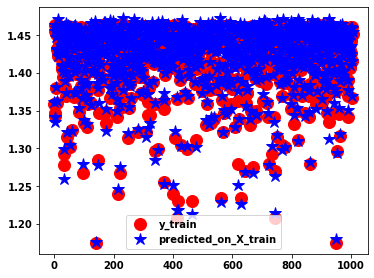

In [208]:
# plt.figure()
plt.subplot(232)
# Plot true data
plt.plot(scaler2.inverse_transform(y_train)[:,0], 'ro', markersize=12, label='y_train')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_train)[:,0], 'b*', markersize=12, label='predicted_on_X_train')
# Legend and plot
plt.legend(loc='best', fontsize=10)

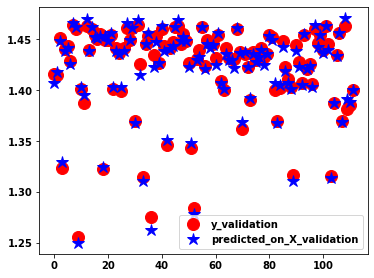

In [209]:
# plt.figure()
plt.subplot(233)
# Plot true data
plt.plot(scaler2.inverse_transform(y_validation)[:,0], 'ro', markersize=12, label='y_validation')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_validation)[:,0], 'b*', markersize=12, label='predicted_on_X_validation')
# Legend and plot
plt.legend(loc='best', fontsize=10)

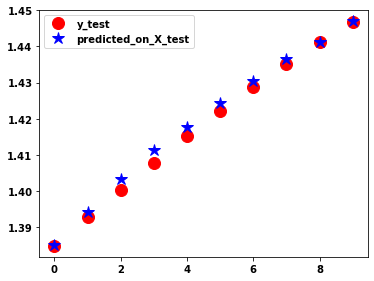

In [210]:
# plt.figure()
plt.subplot(234)
# Plot true data
plt.plot(scaler2.inverse_transform(y_test)[:,0], 'ro', markersize=12, label='y_test')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_test)[:,0], 'b*', markersize=12, label='predicted_on_X_test')
# Legend and plot
plt.legend(loc='best', fontsize=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


Text(0, 0.5, 'predicted')

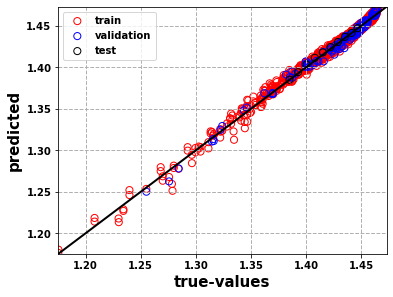

In [211]:
# plt.figure()
plt.subplot(235)
xx = scaler2.inverse_transform(y_train)[:,0]
yy = scaler2.inverse_transform(predicted_on_X_train)[:,0]
xx_validation = scaler2.inverse_transform(y_validation)[:,0]
yy_validation = scaler2.inverse_transform(predicted_on_X_validation)[:,0]
xx_test = scaler2.inverse_transform(y_test)[:,0]
yy_test = scaler2.inverse_transform(predicted_on_X_test)[:,0]
bubble_plot_line_x1y1 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
bubble_plot_line_x2y2 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
plt.xlim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.ylim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.plot(bubble_plot_line_x1y1, bubble_plot_line_x2y2, 'k-', linewidth=2)
plt.grid(linestyle='--', linewidth=1)
plt.scatter(xx, yy, label='train', marker='o', facecolors='', edgecolors='red', s=50)
plt.scatter(xx_validation, yy_validation, label='validation', marker='o', facecolors='', edgecolors='blue', s=50)
plt.scatter(xx_test, yy_test, label='test', marker='o', facecolors='', edgecolors='black', s=50)
plt.legend(loc='best', fontsize=10)
plt.xlabel('true-values', fontsize=15)
plt.ylabel('predicted', fontsize=15)

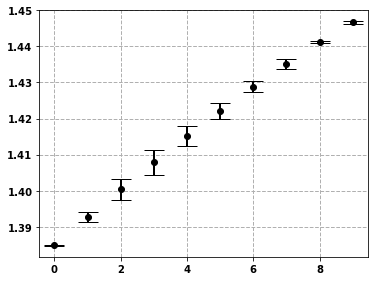

In [212]:
# plt.figure()
plt.subplot(236)
true_values = scaler2.inverse_transform(y_test)[:,0]
predicted_values = scaler2.inverse_transform(predicted_on_X_test)[:,0]
x_index = [i for i in range(len(true_values))]
error_values = predicted_values - true_values
plt.errorbar(x=x_index, y=true_values, yerr=error_values, fmt='o', color='black', 
                    ecolor='black', elinewidth=2, capsize=10);
plt.grid(linestyle='--', linewidth=1)

In [213]:
print()
print("o/p of test set:           \n", (scaler2.inverse_transform(y_test)[:,0]))
print("predicted o/p of test set: \n", (scaler2.inverse_transform(predicted_on_X_test)[:,0]))
print("mse_test_set: ", mean_squared_error(y_test, predicted_on_X_test))


o/p of test set:           
 [1.38489  1.39268  1.40035  1.40784  1.41511  1.42213  1.428834 1.43519
 1.44116  1.4467  ]
predicted o/p of test set: 
 [1.3850069 1.3940885 1.4033427 1.4113683 1.4178398 1.424273  1.4304323
 1.4366077 1.4413685 1.4470652]
mse_test_set:  0.00010945376413476533


In [214]:
###############################################################
#################   plotting graphs together - Aeff  ################
###############################################################

plt.figure()
plt.suptitle('pcf - Aeff - (epochs-{}) - pyTorch'.format(epochs), fontsize=25, 
                color='r', fontweight='bold')     ## giving title on top of all subplots


Text(0.5, 0.98, 'pcf - Aeff - (epochs-5000) - pyTorch')

<Figure size 1440x720 with 0 Axes>

Text(0.5, 0, 'epochs#')

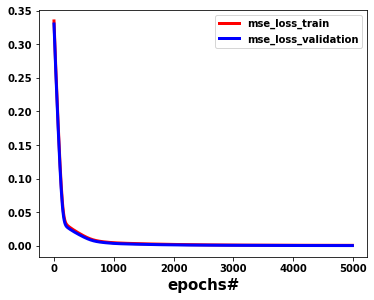

In [215]:
plt.subplot(231)
plt.plot(running_loss_index, running_loss, 'r-', linewidth=3, label='mse_loss_train')
plt.plot(running_loss_validation_index, running_loss_validation, 'b-', linewidth=3, label='mse_loss_validation')
plt.legend(loc='best', fontsize=10)
plt.xlabel('epochs#', fontsize=15)

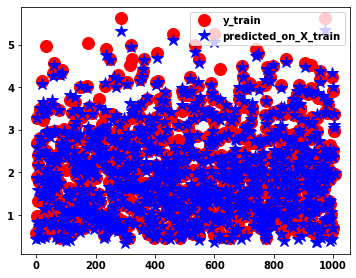

In [216]:
# plt.figure()
plt.subplot(232)
# Plot true data
plt.plot(scaler2.inverse_transform(y_train)[:,1], 'ro', markersize=12, label='y_train')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_train)[:,1], 'b*', markersize=12, label='predicted_on_X_train')
# Legend and plot
plt.legend(loc='best', fontsize=10)

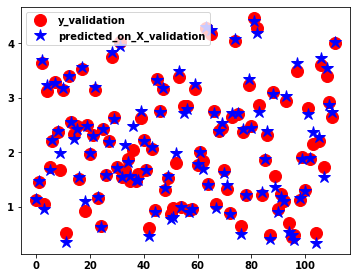

In [217]:
# plt.figure()
plt.subplot(233)
# Plot true data
plt.plot(scaler2.inverse_transform(y_validation)[:,1], 'ro', markersize=12, label='y_validation')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_validation)[:,1], 'b*', markersize=12, label='predicted_on_X_validation')
# Legend and plot
plt.legend(loc='best', fontsize=10)

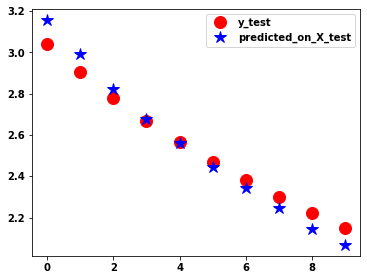

In [218]:
# plt.figure()
plt.subplot(234)
# Plot true data
plt.plot(scaler2.inverse_transform(y_test)[:,1], 'ro', markersize=12, label='y_test')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_test)[:,1], 'b*', markersize=12, label='predicted_on_X_test')
# Legend and plot
plt.legend(loc='best', fontsize=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


Text(0, 0.5, 'predicted')

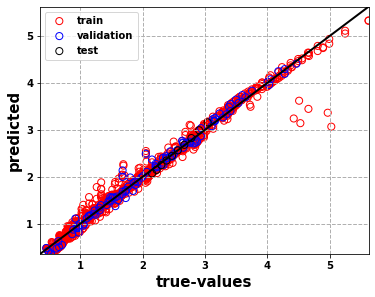

In [219]:
# plt.figure()
plt.subplot(235)
xx = scaler2.inverse_transform(y_train)[:,1]
yy = scaler2.inverse_transform(predicted_on_X_train)[:,1]
xx_validation = scaler2.inverse_transform(y_validation)[:,1]
yy_validation = scaler2.inverse_transform(predicted_on_X_validation)[:,1]
xx_test = scaler2.inverse_transform(y_test)[:,1]
yy_test = scaler2.inverse_transform(predicted_on_X_test)[:,1]
bubble_plot_line_x1y1 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
bubble_plot_line_x2y2 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
plt.xlim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.ylim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.plot(bubble_plot_line_x1y1, bubble_plot_line_x2y2, 'k-', linewidth=2)
plt.grid(linestyle='--', linewidth=1)
plt.scatter(xx, yy, label='train', marker='o', facecolors='', edgecolors='red', s=50)
plt.scatter(xx_validation, yy_validation, label='validation', marker='o', facecolors='', edgecolors='blue', s=50)
plt.scatter(xx_test, yy_test, label='test', marker='o', facecolors='', edgecolors='black', s=50)
plt.legend(loc='best', fontsize=10)
plt.xlabel('true-values', fontsize=15)
plt.ylabel('predicted', fontsize=15)

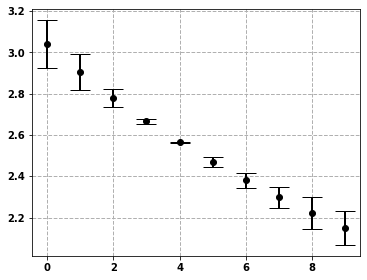

In [220]:
# plt.figure()
plt.subplot(236)
true_values = scaler2.inverse_transform(y_test)[:,1]
predicted_values = scaler2.inverse_transform(predicted_on_X_test)[:,1]
x_index = [i for i in range(len(true_values))]
error_values = predicted_values - true_values
plt.errorbar(x=x_index, y=true_values, yerr=error_values, fmt='o', color='black', 
                    ecolor='black', elinewidth=2, capsize=10);
plt.grid(linestyle='--', linewidth=1)

In [221]:
print()
print("o/p of test set:           \n", (scaler2.inverse_transform(y_test)[:,1]))
print("predicted o/p of test set: \n", (scaler2.inverse_transform(predicted_on_X_test)[:,1]))
print("mse_test_set: ", mean_squared_error(y_test, predicted_on_X_test))


o/p of test set:           
 [3.04184 2.90433 2.78024 2.66742 2.56412 2.46894 2.38074 2.29861 2.22181
 2.14976]
predicted o/p of test set: 
 [3.1573248 2.9900799 2.8231988 2.6790223 2.5612113 2.4444373 2.3446324
 2.247778  2.1439867 2.069697 ]
mse_test_set:  0.00010945376413476533


In [222]:
# ####################################################################################################
# ###########    saving predicted data to excel file   ##############
# plt.show()
# n1 = xx
# n2 = yy
# n3 = true_values
# n4 = predicted_values
# n5 = error_values
# ## convert your array into a dataframe
# # df = pd.DataFrame(l1, columns=['a'])
# df1 = pd.DataFrame(OrderedDict({'y_train':n1, 'predicted_on_X_train':n2}))
# df2 = pd.DataFrame({'y_test':n3, 'predicted_on_X_test':n4, 'error_values':n5}, 
#                         columns=['y_test', 'predicted_on_X_test', 'error_values'])
# ## save to xlsx file
# # filepath_1 = 'test_excel_file_1.xlsx'
# df1.to_excel('test_excel_file_1.xlsx', sheet_name='sheet1', index=False)
# df2.to_excel('test_excel_file_2.xlsx', sheet_name='sheet1', index=False)
# # sys.exit()
# ####################################################################################################

In [223]:
###############################################################
#################   plotting graphs together - disp  ################
###############################################################

plt.figure()
plt.suptitle('pcf - disp - (epochs-{}) - pyTorch'.format(epochs), fontsize=25, 
                color='r', fontweight='bold')     ## giving title on top of all subplots

Text(0.5, 0.98, 'pcf - disp - (epochs-5000) - pyTorch')

<Figure size 1440x720 with 0 Axes>

Text(0.5, 0, 'epochs#')

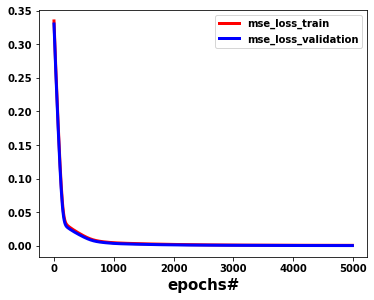

In [224]:
plt.subplot(231)
plt.plot(running_loss_index, running_loss, 'r-', linewidth=3, label='mse_loss_train')
plt.plot(running_loss_validation_index, running_loss_validation, 'b-', linewidth=3, label='mse_loss_validation')
plt.legend(loc='best', fontsize=10)
plt.xlabel('epochs#', fontsize=15)

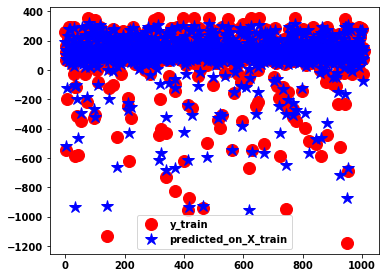

In [225]:
# plt.figure()
plt.subplot(232)
# Plot true data
plt.plot(scaler2.inverse_transform(y_train)[:,2], 'ro', markersize=12, label='y_train')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_train)[:,2], 'b*', markersize=12, label='predicted_on_X_train')
# Legend and plot
plt.legend(loc='best', fontsize=10)

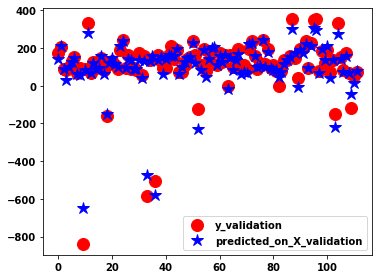

In [226]:
# plt.figure()
plt.subplot(233)
# Plot true data
plt.plot(scaler2.inverse_transform(y_validation)[:,2], 'ro', markersize=12, label='y_validation')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_validation)[:,2], 'b*', markersize=12, label='predicted_on_X_validation')
# Legend and plot
plt.legend(loc='best', fontsize=10)

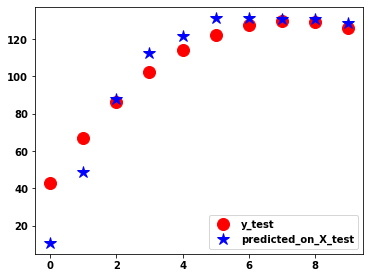

In [227]:
# plt.figure()
plt.subplot(234)
# Plot true data
plt.plot(scaler2.inverse_transform(y_test)[:,2], 'ro', markersize=12, label='y_test')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_test)[:,2], 'b*', markersize=12, label='predicted_on_X_test')
# Legend and plot
plt.legend(loc='best', fontsize=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


Text(0, 0.5, 'predicted')

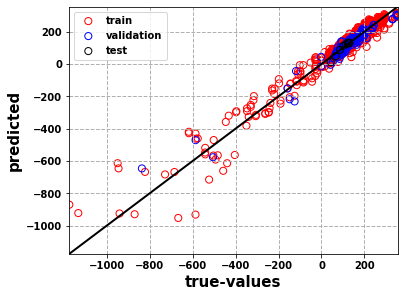

In [228]:
# plt.figure()
plt.subplot(235)
xx = scaler2.inverse_transform(y_train)[:,2]
yy = scaler2.inverse_transform(predicted_on_X_train)[:,2]
xx_validation = scaler2.inverse_transform(y_validation)[:,2]
yy_validation = scaler2.inverse_transform(predicted_on_X_validation)[:,2]
xx_test = scaler2.inverse_transform(y_test)[:,2]
yy_test = scaler2.inverse_transform(predicted_on_X_test)[:,2]
bubble_plot_line_x1y1 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
bubble_plot_line_x2y2 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
plt.xlim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.ylim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.plot(bubble_plot_line_x1y1, bubble_plot_line_x2y2, 'k-', linewidth=2)
plt.grid(linestyle='--', linewidth=1)
plt.scatter(xx, yy, label='train', marker='o', facecolors='', edgecolors='red', s=50)
plt.scatter(xx_validation, yy_validation, label='validation', marker='o', facecolors='', edgecolors='blue', s=50)
plt.scatter(xx_test, yy_test, label='test', marker='o', facecolors='', edgecolors='black', s=50)
plt.legend(loc='best', fontsize=10)
plt.xlabel('true-values', fontsize=15)
plt.ylabel('predicted', fontsize=15)

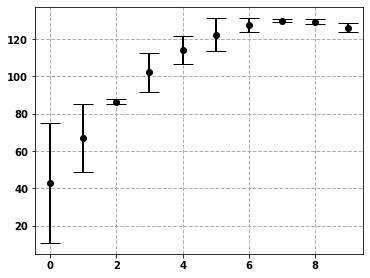

In [229]:
# plt.figure()
plt.subplot(236)
true_values = scaler2.inverse_transform(y_test)[:,2]
predicted_values = scaler2.inverse_transform(predicted_on_X_test)[:,2]
x_index = [i for i in range(len(true_values))]
error_values = predicted_values - true_values
plt.errorbar(x=x_index, y=true_values, yerr=error_values, fmt='o', color='black', 
                    ecolor='black', elinewidth=2, capsize=10);
plt.grid(linestyle='--', linewidth=1)

In [230]:
print()
print("o/p of test set:           \n", (scaler2.inverse_transform(y_test)[:,2]))
print("predicted o/p of test set: \n", (scaler2.inverse_transform(predicted_on_X_test)[:,2]))
print("mse_test_set: ", mean_squared_error(y_test, predicted_on_X_test))


o/p of test set:           
 [ 42.9646  66.7628  86.4249 102.097  114.007  122.422  127.624  129.864
 129.341  126.183 ]
predicted o/p of test set: 
 [ 10.974803  48.53924   87.696945 112.62003  121.55689  131.05101
 131.31631  130.50706  130.5273   128.51027 ]
mse_test_set:  0.00010945376413476533


In [231]:
###############################################################
#################   plotting graphs together - conf-loss  ################
###############################################################

plt.figure()
plt.suptitle('pcf - conf_loss - (epochs-{}) - pyTorch'.format(epochs), fontsize=25, 
                color='r', fontweight='bold')     ## giving title on top of all subplots

Text(0.5, 0.98, 'pcf - conf_loss - (epochs-5000) - pyTorch')

<Figure size 1440x720 with 0 Axes>

Text(0.5, 0, 'epochs#')

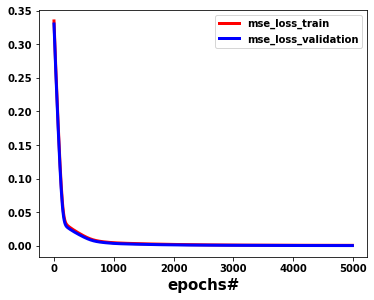

In [232]:
plt.subplot(231)
plt.plot(running_loss_index, running_loss, 'r-', linewidth=3, label='mse_loss_train')
plt.plot(running_loss_validation_index, running_loss_validation, 'b-', linewidth=3, label='mse_loss_validation')
plt.legend(loc='best', fontsize=10)
plt.xlabel('epochs#', fontsize=15)

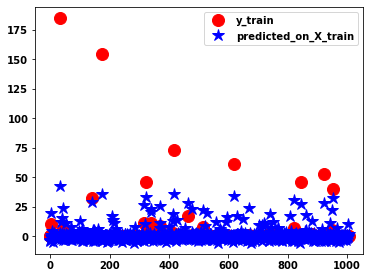

In [233]:
# plt.figure()
plt.subplot(232)
# Plot true data
plt.plot(scaler2.inverse_transform(y_train)[:,3], 'ro', markersize=12, label='y_train')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_train)[:,3], 'b*', markersize=12, label='predicted_on_X_train')
# Legend and plot
plt.legend(loc='best', fontsize=10)

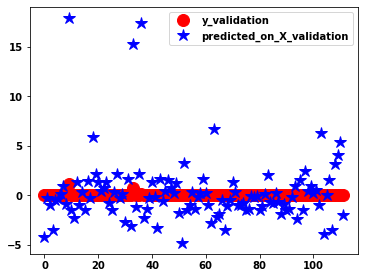

In [234]:
# plt.figure()
plt.subplot(233)
# Plot true data
plt.plot(scaler2.inverse_transform(y_validation)[:,3], 'ro', markersize=12, label='y_validation')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_validation)[:,3], 'b*', markersize=12, label='predicted_on_X_validation')
# Legend and plot
plt.legend(loc='best', fontsize=10)

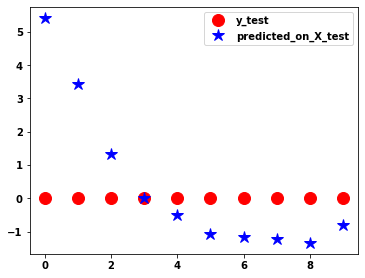

In [235]:
# plt.figure()
plt.subplot(234)
# Plot true data
plt.plot(scaler2.inverse_transform(y_test)[:,3], 'ro', markersize=12, label='y_test')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_test)[:,3], 'b*', markersize=12, label='predicted_on_X_test')
# Legend and plot
plt.legend(loc='best', fontsize=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


Text(0, 0.5, 'predicted')

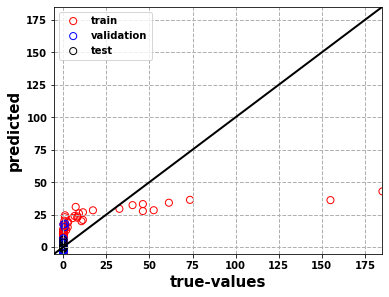

In [236]:
# plt.figure()
plt.subplot(235)
xx = scaler2.inverse_transform(y_train)[:,3]
yy = scaler2.inverse_transform(predicted_on_X_train)[:,3]
xx_validation = scaler2.inverse_transform(y_validation)[:,3]
yy_validation = scaler2.inverse_transform(predicted_on_X_validation)[:,3]
xx_test = scaler2.inverse_transform(y_test)[:,3]
yy_test = scaler2.inverse_transform(predicted_on_X_test)[:,3]
bubble_plot_line_x1y1 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
bubble_plot_line_x2y2 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
plt.xlim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.ylim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.plot(bubble_plot_line_x1y1, bubble_plot_line_x2y2, 'k-', linewidth=2)
plt.grid(linestyle='--', linewidth=1)
plt.scatter(xx, yy, label='train', marker='o', facecolors='', edgecolors='red', s=50)
plt.scatter(xx_validation, yy_validation, label='validation', marker='o', facecolors='', edgecolors='blue', s=50)
plt.scatter(xx_test, yy_test, label='test', marker='o', facecolors='', edgecolors='black', s=50)
plt.legend(loc='best', fontsize=10)
plt.xlabel('true-values', fontsize=15)
plt.ylabel('predicted', fontsize=15)

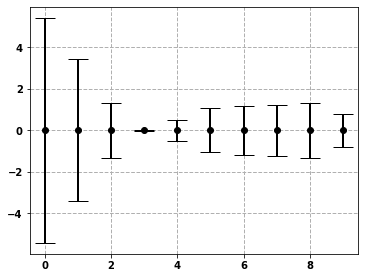

In [237]:
# plt.figure()
plt.subplot(236)
true_values = scaler2.inverse_transform(y_test)[:,3]
predicted_values = scaler2.inverse_transform(predicted_on_X_test)[:,3]
x_index = [i for i in range(len(true_values))]
error_values = predicted_values - true_values
plt.errorbar(x=x_index, y=true_values, yerr=error_values, fmt='o', color='black', 
                    ecolor='black', elinewidth=2, capsize=10);
plt.grid(linestyle='--', linewidth=1)

In [238]:
print()
print("o/p of test set:           \n", (scaler2.inverse_transform(y_test)[:,3]))
print("predicted o/p of test set: \n", (scaler2.inverse_transform(predicted_on_X_test)[:,3]))
print("mse_test_set: ", mean_squared_error(y_test, predicted_on_X_test))


o/p of test set:           
 [1.54506e-04 3.24724e-05 6.02749e-06 9.78811e-07 1.37772e-07 1.66735e-08
 1.72620e-09 1.52937e-10 1.16957e-11 7.86184e-13]
predicted o/p of test set: 
 [ 5.413812    3.423122    1.3217286   0.02084288 -0.5170971  -1.0604827
 -1.1710562  -1.2272507  -1.3315685  -0.7929235 ]
mse_test_set:  0.00010945376413476533


In [239]:
###############################################################
#################   plotting graphs together - conf-loss-in-log10  ################
###############################################################

plt.figure()
plt.suptitle('pcf - conf_loss_in_log10 - (epochs-{}) - pyTorch'.format(epochs), fontsize=25, 
                color='r', fontweight='bold')     ## giving title on top of all subplots

Text(0.5, 0.98, 'pcf - conf_loss_in_log10 - (epochs-5000) - pyTorch')

<Figure size 1440x720 with 0 Axes>

Text(0.5, 0, 'epochs#')

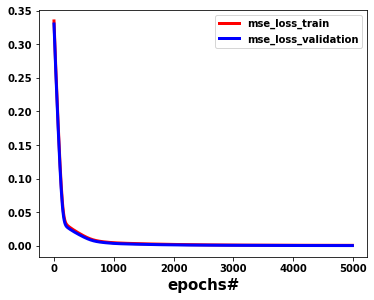

In [240]:
plt.subplot(231)
plt.plot(running_loss_index, running_loss, 'r-', linewidth=3, label='mse_loss_train')
plt.plot(running_loss_validation_index, running_loss_validation, 'b-', linewidth=3, label='mse_loss_validation')
plt.legend(loc='best', fontsize=10)
plt.xlabel('epochs#', fontsize=15)

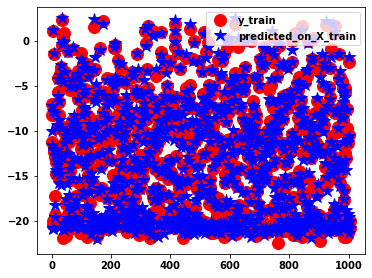

In [241]:
# plt.figure()
plt.subplot(232)
# Plot true data
plt.plot(scaler2.inverse_transform(y_train)[:,4], 'ro', markersize=12, label='y_train')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_train)[:,4], 'b*', markersize=12, label='predicted_on_X_train')
# Legend and plot
plt.legend(loc='best', fontsize=10)

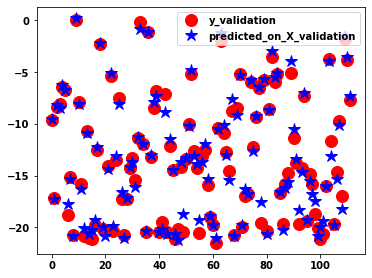

In [242]:
# plt.figure()
plt.subplot(233)
# Plot true data
plt.plot(scaler2.inverse_transform(y_validation)[:,4], 'ro', markersize=12, label='y_validation')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_validation)[:,4], 'b*', markersize=12, label='predicted_on_X_validation')
# Legend and plot
plt.legend(loc='best', fontsize=10)

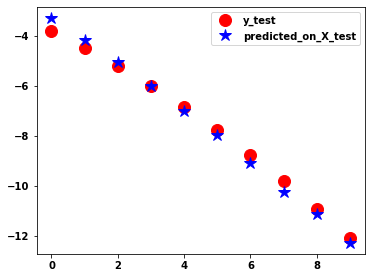

In [243]:
# plt.figure()
plt.subplot(234)
# Plot true data
plt.plot(scaler2.inverse_transform(y_test)[:,4], 'ro', markersize=12, label='y_test')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_test)[:,4], 'b*', markersize=12, label='predicted_on_X_test')
# Legend and plot
plt.legend(loc='best', fontsize=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


Text(0, 0.5, 'predicted')

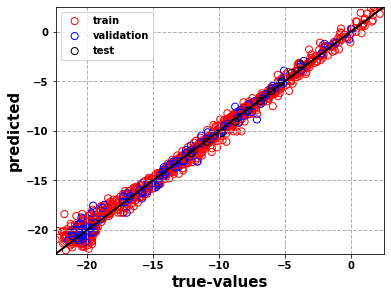

In [244]:
# plt.figure()
plt.subplot(235)
xx = scaler2.inverse_transform(y_train)[:,4]
yy = scaler2.inverse_transform(predicted_on_X_train)[:,4]
xx_validation = scaler2.inverse_transform(y_validation)[:,4]
yy_validation = scaler2.inverse_transform(predicted_on_X_validation)[:,4]
xx_test = scaler2.inverse_transform(y_test)[:,4]
yy_test = scaler2.inverse_transform(predicted_on_X_test)[:,4]
bubble_plot_line_x1y1 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
bubble_plot_line_x2y2 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
plt.xlim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.ylim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.plot(bubble_plot_line_x1y1, bubble_plot_line_x2y2, 'k-', linewidth=2)
plt.grid(linestyle='--', linewidth=1)
plt.scatter(xx, yy, label='train', marker='o', facecolors='', edgecolors='red', s=50)
plt.scatter(xx_validation, yy_validation, label='validation', marker='o', facecolors='', edgecolors='blue', s=50)
plt.scatter(xx_test, yy_test, label='test', marker='o', facecolors='', edgecolors='black', s=50)
plt.legend(loc='best', fontsize=10)
plt.xlabel('true-values', fontsize=15)
plt.ylabel('predicted', fontsize=15)

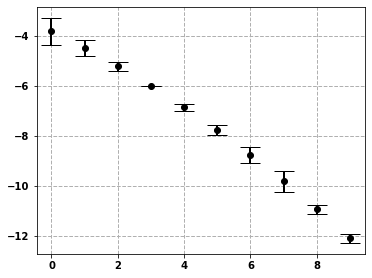

In [245]:
# plt.figure()
plt.subplot(236)
true_values = scaler2.inverse_transform(y_test)[:,4]
predicted_values = scaler2.inverse_transform(predicted_on_X_test)[:,4]
x_index = [i for i in range(len(true_values))]
error_values = predicted_values - true_values
plt.errorbar(x=x_index, y=true_values, yerr=error_values, fmt='o', color='black', 
                    ecolor='black', elinewidth=2, capsize=10);
plt.grid(linestyle='--', linewidth=1)

In [246]:
print()
print("o/p of test set:           \n", (scaler2.inverse_transform(y_test)[:,4]))
print("predicted o/p of test set: \n", (scaler2.inverse_transform(predicted_on_X_test)[:,4]))
print("mse_test_set: ", mean_squared_error(y_test, predicted_on_X_test))
print()


o/p of test set:           
 [ -3.81105465  -4.48848561  -5.2198635   -6.00930116  -6.86083904
  -7.77797323  -8.76290889  -9.81548743 -10.93197378 -12.1044758 ]
predicted o/p of test set: 
 [ -3.2778392  -4.157344   -5.028073   -6.005282   -6.9948153  -7.9743195
  -9.098246  -10.238086  -11.110189  -12.272999 ]
mse_test_set:  0.00010945376413476533



[1.54506e-04 3.24724e-05 6.02749e-06 9.78811e-07 1.37772e-07 1.66735e-08
 1.72620e-09 1.52937e-10 1.16957e-11 7.86184e-13]
[ 5.413812    3.423122    1.3217286   0.02084288 -0.5170971  -1.0604827
 -1.1710562  -1.2272507  -1.3315685  -0.7929235 ]


Text(0.5, 1.0, 'conf-loss-without-log10')

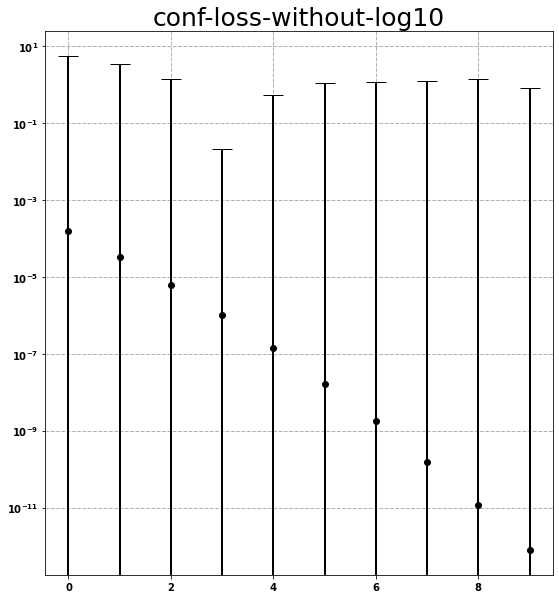

In [247]:
###############################################################
#################   plotting graphs together - conf-loss-without/with-log10  ################
###############################################################

plt.figure()
plt.subplot(121)
true_values = scaler2.inverse_transform(y_test)[:,3]
predicted_values = scaler2.inverse_transform(predicted_on_X_test)[:,3]
print(true_values)
print(predicted_values)
x_index = [i for i in range(len(true_values))]
error_values = predicted_values - true_values
plt.errorbar(x=x_index, y=true_values, yerr=error_values, fmt='o', color='black', 
                    ecolor='black', elinewidth=2, capsize=10)
plt.yscale('log')
plt.grid(linestyle='--', linewidth=1)
plt.title('conf-loss-without-log10', fontsize=25)

[1.54506e-04 3.24724e-05 6.02749e-06 9.78811e-07 1.37772e-07 1.66735e-08
 1.72620e-09 1.52937e-10 1.16957e-11 7.86184e-13]
[5.2742515e-04 6.9607515e-05 9.3740482e-06 9.8791156e-07 1.0120097e-07
 1.0609149e-08 7.9754348e-10 5.7798193e-11 7.7590859e-12 5.3333634e-13]


Text(0.5, 1.0, 'conf-loss-with-log10')

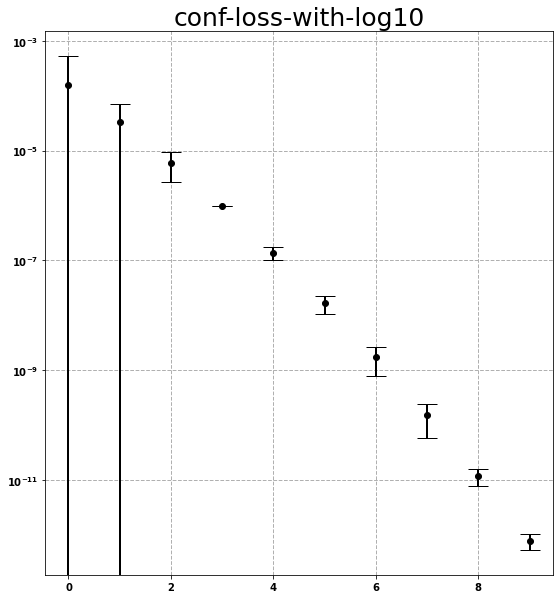

In [248]:
plt.subplot(122)
true_values = 10**(scaler2.inverse_transform(y_test)[:,4])
predicted_values = 10**(scaler2.inverse_transform(predicted_on_X_test)[:,4])
print(true_values)
print(predicted_values)
x_index = [i for i in range(len(true_values))]
error_values = predicted_values - true_values
plt.errorbar(x=x_index, y=true_values, yerr=error_values, fmt='o', color='black', 
                    ecolor='black', elinewidth=2, capsize=10)
plt.yscale('log')                    
plt.grid(linestyle='--', linewidth=1)
plt.title('conf-loss-with-log10', fontsize=25)

In [249]:
# ####################################################################################################
# ###########    saving predicted data to excel file   ##############
# plt.show()
# n1 = xx
# n2 = yy
# n3 = true_values
# n4 = predicted_values
# n5 = error_values
# ## convert your array into a dataframe
# # df = pd.DataFrame(l1, columns=['a'])
# df1 = pd.DataFrame(OrderedDict({'y_train':n1, 'predicted_on_X_train':n2}))
# df2 = pd.DataFrame({'y_test':n3, 'predicted_on_X_test':n4, 'error_values':n5}, 
#                         columns=['y_test', 'predicted_on_X_test', 'error_values'])
# ## save to xlsx file
# # filepath_1 = 'test_excel_file_1.xlsx'
# df1.to_excel('test_excel_file_1.xlsx', sheet_name='sheet1', index=False)
# df2.to_excel('test_excel_file_2.xlsx', sheet_name='sheet1', index=False)
# # sys.exit()
# ####################################################################################################

In [250]:
plt.show()

In [251]:
###########    saving predicted data to excel file   ##############
l1 = 10**(scaler2.inverse_transform(y_test)[:,4])                     #### check multiple of 10
l2 = 10**(scaler2.inverse_transform(predicted_on_X_test)[:,4])        #### check multiple of 10
###########    saving mse data to excel file   ##############
l3 = running_loss
l4 = running_loss_validation
l5 = running_loss_index
l6 = running_loss_validation_index

## convert your array into a dataframe
# df = pd.DataFrame(l1, columns=['a'])
df = pd.DataFrame({'a':l3, 'b':l4})

## save to xlsx file
filepath = 'test_excel_file.xlsx'
df.to_excel(filepath, sheet_name='sheet1', index=False)


# sys.exit()


In [252]:
##########################################
#######           GUI           ##########
##########################################

plt.figure(figsize=(4, 3))
fig = plt.gcf()      # if using Pyplot then get the figure from the plot
figure_x, figure_y, figure_w, figure_h = fig.bbox.bounds
print(figure_w)



"""
Demonstrates one way of embedding Matplotlib figures into a PySimpleGUI window.
Basic steps are:
 * Create a Canvas Element
 * Layout form
 * Display form (NON BLOCKING)
 * Draw plots onto convas
 * Display form (BLOCKING)
"""

288.0


'\nDemonstrates one way of embedding Matplotlib figures into a PySimpleGUI window.\nBasic steps are:\n * Create a Canvas Element\n * Layout form\n * Display form (NON BLOCKING)\n * Draw plots onto convas\n * Display form (BLOCKING)\n'

<Figure size 288x216 with 0 Axes>

In [253]:
def draw_figure(canvas, figure, loc=(0, 0)):
    """ Draw a matplotlib figure onto a Tk canvas
    loc: location of top-left corner of figure on canvas in pixels.
    Inspired by matplotlib source: lib/matplotlib/backends/backend_tkagg.py
    """
    figure_canvas_agg = FigureCanvasAgg(figure)
    figure_canvas_agg.draw()
    figure_x, figure_y, figure_w, figure_h = figure.bbox.bounds
    figure_w, figure_h = int(figure_w), int(figure_h)
    photo = Tk.PhotoImage(master=canvas, width=figure_w, height=figure_h)
    canvas.create_image(loc[0] + figure_w/2, loc[1] + figure_h/2, image=photo)
    tkagg.blit(photo, figure_canvas_agg.get_renderer()._renderer, colormode=2)
    return photo

In [254]:
layout = [
    [
    sg.Image(filename='hexagonal_pcf_image.PNG', size=(250, 250)),
    sg.Text('\n Hexagonal \n PCF', size=(15, 4), background_color='orange', justification='center', font=("Helvetica", 40), relief=sg.RELIEF_RIDGE)],
    [sg.Text('_'  * 100)],
    [sg.Frame('Material',[
        # [sg.Text('')],
        [sg.Text('Core  ', font=("Helvetica", 20), text_color=''), sg.Radio('Silica', "RADIO1", default=True, key='core_silica'), 
        # sg.Radio('ChG', "RADIO1", key='core_ChG')
        ],
        # [sg.Text('')],
        [sg.Text('Holes ', font=("Helvetica", 20), text_color=''), sg.Radio('Air', "RADIO2", default=True, key='holes_air')],
		], font=("Helvetica", 20), title_color='blue'),
    sg.Frame('Wavelength (um)',[
		[sg.Slider(range=(0.5, 1.8), resolution=0.005, orientation='h', size=(15, 20), default_value=1.55, key='wavelength')]], font=("Helvetica", 20), title_color='blue'),
    sg.Frame('Parameters',[
        [sg.Text('No. of Rings', font=("Helvetica", 20), text_color=''), sg.Radio('4', "RADIO3", default=True, key='no_of_rings_4'), sg.Radio('5', "RADIO3", key='no_of_rings_5')],
 		[sg.Text('Pitch (um)  ', font=("Helvetica", 20), text_color=''), sg.Slider(range=(0.8, 2), resolution=0.1, orientation='h', size=(15, 20), default_value=1.5, key='pitch')],
        [sg.Text('Dia by Pitch', font=("Helvetica", 20), text_color=''), sg.Radio('0.6', "RADIO4", key='diaBYpitch_0.6'), sg.Radio('0.7', "RADIO4", default=True, key='diaBYpitch_0.7'),],
 		[sg.Text('                  ', font=("Helvetica", 20),), sg.Radio('0.8', "RADIO4", key='diaBYpitch_0.8'), sg.Radio('0.9', "RADIO4", key='diaBYpitch_0.9'),]
        ], font=("Helvetica", 20), title_color='blue')
        ],
    [sg.Text('_'  * 100)],    
    [sg.Button('Calculate', tooltip='Click to calculate various values...', button_color=('white', 'green'), size=(10,2), font=("Helvetica", 25)),
    sg.Text(' '  * 8),
    sg.Frame('neff',[[
		sg.Multiline(default_text=' ', key='neff', size=(10, 3))
		]], font=("Helvetica", 10), title_color='red'),
    sg.Frame('Aeff (um^2)',[[
		sg.Multiline(default_text=' ', key='Aeff', size=(10, 3))
		]], font=("Helvetica", 10), title_color='red'),
    sg.Frame('Disp (ps/Km.nm)',[[
		sg.Multiline(default_text=' ', key='disp', size=(10, 3))
		]], font=("Helvetica", 10), title_color='red'),
    # sg.Frame('Lc (dB/cm)',[[
	# 	sg.Multiline(default_text=' ', key='conf_loss', size=(10, 3))
	# 	]], font=("Helvetica", 10), title_color='red'),
    sg.Frame('Lc-using-Log (dB/cm)',[[
		sg.Multiline(default_text=' ', key='conf_loss_using_log', size=(10, 3))
		]], font=("Helvetica", 10), title_color='red'),    
    # sg.Canvas(size=(figure_w, figure_h), key='canvas')    
    ],
    [sg.Button('Exit', tooltip='Click to exit the window...', button_color=('black', 'red'), size=(10,2), font=("Helvetica", 15))]
]

window = sg.Window('PCF', layout, location=(400,25), 
						default_element_size=(40, 1), grab_anywhere=False,
						resizable=True, background_color=None, font=("Helvetica", 13))

#event, values = window.Read()



In [255]:
def calculate_values():
    
    print()
    print('core_silica: ', values['core_silica'])
    # print('core_ChG: ', values['core_ChG'])
    print('holes_air: ', values['holes_air'])
    print('wavelength (um): ', values['wavelength'])
    print('no_of_rings_4: ', values['no_of_rings_4'])
    print('no_of_rings_5: ', values['no_of_rings_5'])
    print('pitch (um)    : ', values['pitch'])
    print('diaBYpitch_0.6: ', values['diaBYpitch_0.6'])
    print('diaBYpitch_0.7: ', values['diaBYpitch_0.7'])
    print('diaBYpitch_0.8: ', values['diaBYpitch_0.8'])
    print('diaBYpitch_0.9: ', values['diaBYpitch_0.9'])


    if (values['core_silica'] == True):
        core_ref = 1.444
    # elif (values['core_ChG'] == True):
    #     core_ref = 2.567  

    if (values['holes_air'] == True):
        holes_ref = 1.0
    
    if (values['no_of_rings_4'] == True):
        no_of_rings = 4
    elif (values['no_of_rings_5'] == True):
        no_of_rings = 5
        
    
    if (values['diaBYpitch_0.6'] == True):
        diaBYpitch = 0.6
    elif (values['diaBYpitch_0.7'] == True):
        diaBYpitch = 0.7
    elif (values['diaBYpitch_0.8'] == True):
        diaBYpitch = 0.8
    elif (values['diaBYpitch_0.9'] == True):
        diaBYpitch = 0.9
    

    ###########     manual testing from GUI   #########
    #### [[ core_ref, holes_ref, no_of_rings, diaBYpitch, wavelength, pitch,  zero-neff, zero-Aeff, zero-disp, zero-conf-loss, zero-conf-loss-in-log]]
    datafile_3 = np.array([[core_ref, holes_ref, no_of_rings, diaBYpitch, values['wavelength'], values['pitch'],  0, 0, 0, 0, 0]])
    scaler_datafile_3 = scaler1.transform(datafile_3)
    X_test_GUI = scaler_datafile_3[:,range(0,6)]
    print(datafile_3)
    print(X_test_GUI)
    ###################################################

    predicted_on_X_test_GUI = model(torch.Tensor(X_test_GUI)).data.numpy()
    print("\npredicted o/p of test set GUI: \n", scaler2.inverse_transform(predicted_on_X_test_GUI))
    
    print(predicted_on_X_test_GUI)
    print(scaler2.inverse_transform(predicted_on_X_test_GUI))
    print(scaler2.inverse_transform(predicted_on_X_test_GUI).item(0,0), 
            scaler2.inverse_transform(predicted_on_X_test_GUI).item(0,1),
            scaler2.inverse_transform(predicted_on_X_test_GUI).item(0,2))
    X_test_GUI_neff = round(scaler2.inverse_transform(predicted_on_X_test_GUI).item(0,0), 5)
    X_test_GUI_Aeff = round(scaler2.inverse_transform(predicted_on_X_test_GUI).item(0,1), 5)
    X_test_GUI_disp = round(scaler2.inverse_transform(predicted_on_X_test_GUI).item(0,2), 5)
    X_test_GUI_confLoss = format((scaler2.inverse_transform(predicted_on_X_test_GUI).item(0,3)), '4E')
    ##### taking antilog to get the predicted conf loss (not in log values)   #####
    #####   use 'e or g, E or G'  for exponential format   ##### 
    X_test_GUI_confLossUsingLog = format(10**(scaler2.inverse_transform(predicted_on_X_test_GUI).item(0,4)), '.5E')
    print(X_test_GUI_neff, X_test_GUI_Aeff, X_test_GUI_disp, X_test_GUI_confLoss, X_test_GUI_confLossUsingLog)
    return X_test_GUI_neff, X_test_GUI_Aeff, X_test_GUI_disp, X_test_GUI_confLoss, X_test_GUI_confLossUsingLog





while True:                 # Event Loop
    event, values = window.Read()
    # sg.Popup('The results of the window-- ',
	# 		'The button clicked was "{}"'.format(event),
	# 		'The values are: ', values)

    if event is None or event == 'Exit':
        break
    if event == 'Calculate':
        X_test_GUI_updated = calculate_values()
        # change the "output" element to be the value of "input" element
        window.FindElement('neff').Update(X_test_GUI_updated[0])
        window.FindElement('Aeff').Update(X_test_GUI_updated[1])
        window.FindElement('disp').Update(X_test_GUI_updated[2])
        # window.FindElement('conf_loss').Update(X_test_GUI_updated[3])
        window.FindElement('conf_loss_using_log').Update(X_test_GUI_updated[4])
        # add the plot to the window
        # fig_photo = draw_figure(window.FindElement('canvas').TKCanvas, fig)


window.Close()


TclError: ignored

In [ ]:
window.Close()